In [ ]:
from IPython import get_ipython
from IPython.display import display
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
files.upload_file('du_lieu_da_xu_ly(1).csv')

Saved du_lieu_da_xu_ly.csv to /content/du_lieu_da_xu_ly(1).csv


In [ ]:
pip install lazypredict

In [ ]:
df=pd.read_csv('du_lieu_da_xu_ly(1).csv')
df.head()

,title,price,ratings,num_rates,screen_size,refresh_rate,chipset,GPU,sim_slot,operating_system,storage_GB,battery_mAh,RAM_in_GB
0,ASUS ROG Phone 6 12GB 256GB,14490000,5.00,20,6.78,120,Qualcomm ® Snapdragon ® 8+ thế hệ 1,Adreno ™ 730,2 SIM (Nano-SIM),Android,256.00,6000,12.00
1,BENCO V91 4GB 128GB,2690000,5.00,1,6.56,90,Unisoc T606,Adreno 610,2 SIM (Nano-SIM),Android,128.00,5000,8.00
2,Benco S1 Pro 8GB 256GB,4290000,5.00,10,6.80,120,Unisoc T616,Mali-G57,2 SIM (Nano-SIM),Android,256.00,5000,16.00
3,INOI 288S 4G,1000000,5.00,1,2.00,120,Apple A18 Pro,Adreno 610,2 SIM (Nano-SIM),Android,192.00,1000,8.00
4,INOI Note 13s 8GB 256GB,2790000,5.00,2,6.95,120,Unisoc T606,Adreno 610,2 SIM (Nano-SIM),Android,256.00,5000,8.00


In [ ]:
from lazypredict.Supervised import LazyClassifier, LazyRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [ ]:

# Bước 2: Chọn cột đầu vào và cột mục tiêu
numerical_cols = ['RAM_in_GB', 'screen_size', 'refresh_rate', 'storage_GB']
categorical_cols = ['operating_system', 'chipset']
target_col = 'price'

# Bước 3: Xử lý thiếu dữ liệu
# df = df[numerical_cols + categorical_cols + [target_col]].dropna()

# Bước 4: Encode cột phân loại
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le  # lưu nếu cần decode lại

# Bước 5: Tạo X, y và chia tập train/test
X = df[numerical_cols + categorical_cols]
y = df[target_col]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Bước 6: Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Bước 7: Chạy LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

# Bước 8: Hiển thị kết quả
print(models)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 114
[LightGBM] [Info] Number of data points in the train set: 226, number of used features: 6
[LightGBM] [Info] Start training from score 11539336.283186
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import HistGradientBoostingRegressor
param_grid = {
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'max_iter': [100, 200, 300, 500],
    'max_depth': [None, 3, 5, 10],
    'min_samples_leaf': [10, 20, 30, 50],
    'l2_regularization': [0.0, 0.1, 1.0, 5.0]
}

hist_base = HistGradientBoostingRegressor(random_state=42)

search = RandomizedSearchCV(
    estimator=hist_base,
    param_distributions=param_grid,
    n_iter=30,
    scoring='r2',
    cv=5,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

search.fit(X_train, y_train)
print("Best parameters:", search.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best parameters: {'min_samples_leaf': 10, 'max_iter': 200, 'max_depth': 3, 'learning_rate': 0.05, 'l2_regularization': 0.1}


In [ ]:
# Dùng mô hình tốt nhất
best_hist = search.best_estimator_

# Dự đoán
y_pred = best_hist.predict(X_test)

# Đánh giá
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"✅ R² score (sau tuning): {r2:.4f}")
print(f"✅ RMSE (sau tuning): {rmse:,.2f} VNĐ")


✅ R² score (sau tuning): 0.8831
✅ RMSE (sau tuning): 3,921,157.40 VNĐ


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error

# Dự đoán
y_pred = best_hist.predict(X_test)

# Tính toán lại R2 và RMSE nếu muốn xác nhận
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"✅ R² score: {r2:.4f}")
print(f"✅ RMSE: {rmse:,.2f} VNĐ")

# Chuyển kết quả thành DataFrame để dễ xuất
results_df = pd.DataFrame({
    'Giá thực tế (VNĐ)': y_test.values,
    'Giá dự đoán (VNĐ)': y_pred.astype(int)
})
results_df['Sai lệch (VNĐ)'] = results_df['Giá dự đoán (VNĐ)'] - results_df['Giá thực tế (VNĐ)']


✅ R² score: 0.8831
✅ RMSE: 3,921,157.40 VNĐ


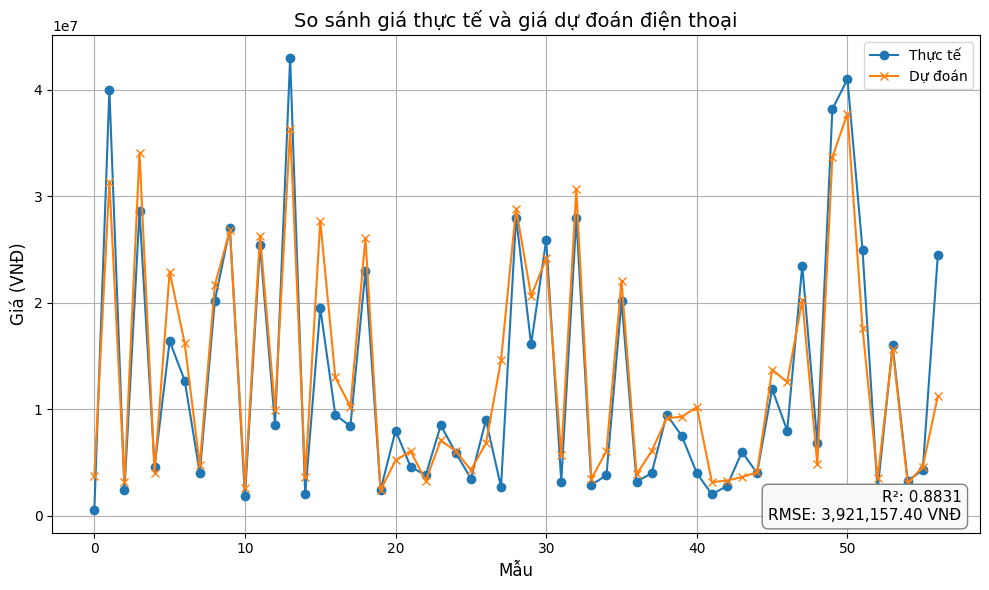

In [ ]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ
plt.figure(figsize=(10, 6))
plt.plot(results_df['Giá thực tế (VNĐ)'].values, label='Thực tế', marker='o')
plt.plot(results_df['Giá dự đoán (VNĐ)'].values, label='Dự đoán', marker='x')

# Tiêu đề và trục
plt.title('So sánh giá thực tế và giá dự đoán điện thoại', fontsize=14)
plt.xlabel('Mẫu', fontsize=12)
plt.ylabel('Giá (VNĐ)', fontsize=12)

# Thêm chú thích R² và RMSE ở vị trí mới (góc dưới bên phải)
metrics_text = f"R²: {r2:.4f}\nRMSE: {rmse:,.2f} VNĐ"
plt.text(0.98, 0.02, metrics_text,
         transform=plt.gca().transAxes,
         fontsize=11,
         verticalalignment='bottom',
         horizontalalignment='right',
         bbox=dict(boxstyle='round,pad=0.4', facecolor='#f9f9f9', edgecolor='gray'))

# Hoàn thiện biểu đồ
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
